In [2]:
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns

In [30]:
lima = pd.read_csv("../data/alert_lima.csv")
quito = pd.read_csv("../data/alert_quito.csv")
xalapa = pd.read_csv("../data/alert_xalapa.csv")
saopaulo = pd.read_csv("../data/alert_saopaulo.csv")
montevideo = pd.read_csv("../data/alert_montevideo.csv")

/home/brain/anaconda3/envs/smartcities/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
from pandas import to_datetime

def create_weekday(df, diff_time):
    """
    
    """
    
    datetime = to_datetime(df['pub_utc_date'])

    
    
    datetime = datetime - pd.Timedelta(hours=diff_time)

    weekday = [date.weekday() 
               for date in datetime]
    
    hour = [date.hour 
            for date in datetime]
    
    return weekday, hour
    
def feature_extract(dataframe, timezone):
    """
    
    """
    
    weekday, hour = create_weekday(dataframe, timezone)
    
    dataframe['weekday'] = weekday
    dataframe['hour'] = hour
    
    return dataframe[['year', 'month', 'day', 'hour', 'city', 'street', 'longitude',
       'latitude', 'weekday']]

In [33]:
feature_extract(lima, 5).to_csv("../data/alert_lima.csv", index=None)
feature_extract(quito, 5).to_csv("../data/alert_quito.csv", index=None)
feature_extract(xalapa, 5).to_csv("../data/alert_xalapa.csv", index=None)
feature_extract(saopaulo, 3).to_csv("../data/alert_saopaulo.csv", index=None)
feature_extract(montevideo, 3).to_csv("../data/alert_montevideo.csv", index=None)

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("../data/quito-acidentes.xlsx", sheet_name=None)
df_waze_alert = pd.read_csv("../data/alert_quito.csv")

description = df_waze_alert.groupby(
    ["type", "year", "month"]).size()
count_waze = description.unstack().reset_index()

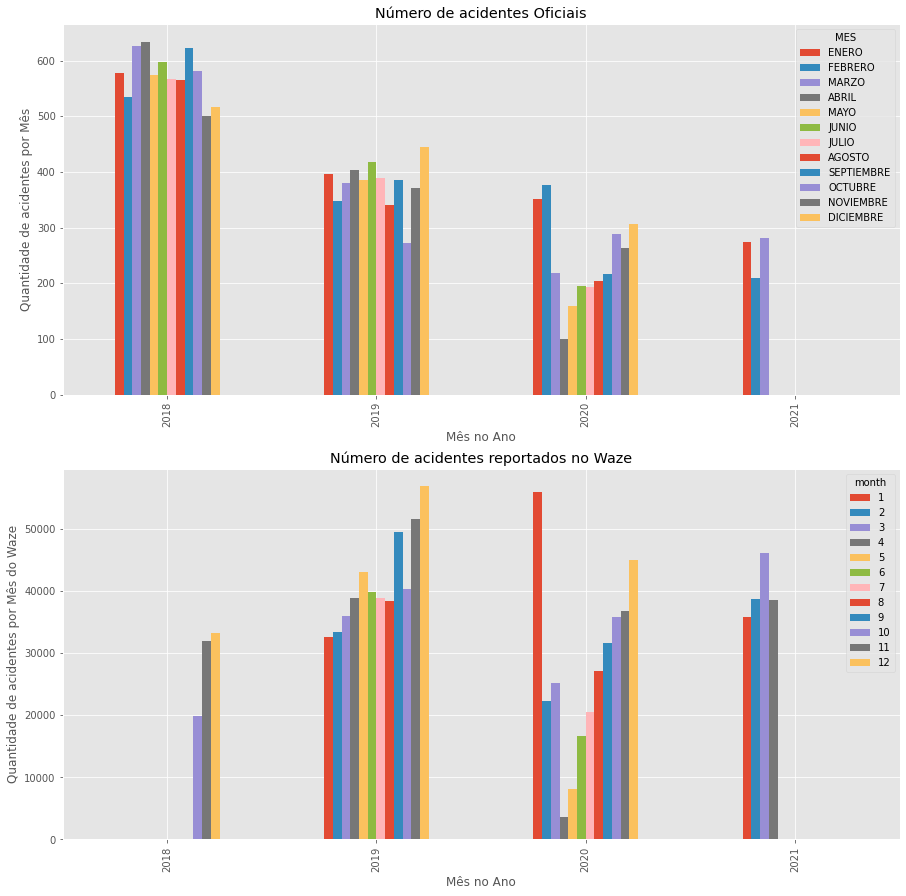

In [80]:
fig, ax = plt.subplots(nrows=2, figsize=(15,15))
df['acidentes'][:-1:].set_index("MES").T.plot.bar(ax=ax[0])

ax[0].set_title("Número de acidentes Oficiais")
ax[0].set_xlabel("Mês no Ano")
_ = ax[0].set_ylabel("Quantidade de acidentes por Mês")

count_waze[count_waze['type'] == 'ACCIDENT'].drop('type', 1).set_index('year').plot.bar(ax=ax[1])

ax[1].set_title("Número de acidentes reportados no Waze")
ax[1].set_xlabel("Mês no Ano")
_ = ax[1].set_ylabel("Quantidade de acidentes por Mês do Waze")

In [113]:
acidentes_quito =  df['acidentes'][:-1:].set_index("MES").T
acidentes_quito_waze = count_waze[count_waze['type'] == 'ACCIDENT'].drop('type', 1).set_index('year')
X_official = acidentes_quito[1:].to_numpy().reshape(-1)[:27]
Y_waze = acidentes_quito_waze[1:].fillna(0).to_numpy().reshape(-1)[:27]
colors = [2019]*12 + [2020]*12 + [2021]*3

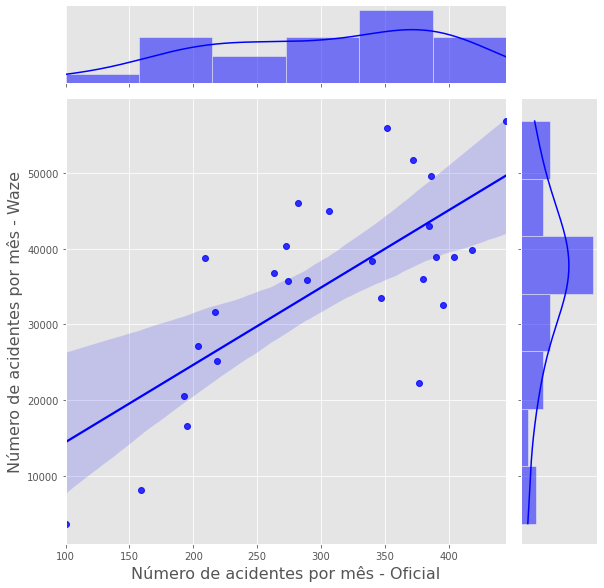

In [116]:

df = pd.DataFrame([X_official, Y_waze, colors], index=['official', 'waze', 'year']).T

JG1 = sns.jointplot(x=X_official.astype(float), y=Y_waze.astype(float),color='b', kind="reg", height=8)
#g0 = sns.lmplot(x="official", y="waze", hue="year", data=df)

JG1.set_axis_labels('Número de acidentes por mês - Oficial', 'Número de acidentes por mês - Waze', fontsize=16)

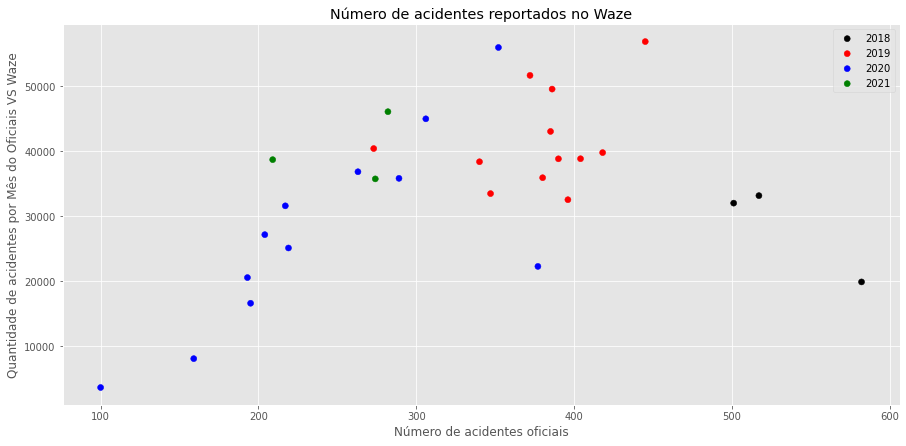

In [169]:
fig, ax = plt.subplots(figsize=(15,7))
X_2018 = acidentes_quito.to_numpy()[0][-3:]
y_2018 = acidentes_quito_waze.fillna(0).to_numpy().reshape(-1)[9:12]

plt.scatter(x=X_2018, y=y_2018, c=['black']*3 )
plt.scatter(x=X_official[:12], y=Y_waze[:12], c=['r']*12 )
plt.scatter(x=X_official[12:24], y=Y_waze[12:24], c=['b']*12)
plt.scatter(x=X_official[24:], y=Y_waze[24:], c=['g']*3)

plt.legend(("2018","2019","2020","2021"))

ax.set_title("Número de acidentes reportados no Waze")
ax.set_xlabel("Número de acidentes oficiais")
_ = ax.set_ylabel("Quantidade de acidentes por Mês do Oficiais VS Waze")

-----------------------

In [180]:
df_waze_alert['weekday'] = [date.weekday() for date in pd.to_datetime(df_waze_alert['pub_utc_date'])]

In [5]:
accidents =  df_waze_alert[df_waze_alert['type'] == 'ACCIDENT']

In [10]:
accidents[accidents['subtype'] == 'ACCIDENT_MAJOR'].to_csv("exemplo_mapa.csv",index=None)

In [8]:
acc_year = pd.read_csv("examplo_mapa.csv")

In [9]:
acc_year

,pub_utc_date,year,month,day,hour,polygon_slug,uuid,pubmillis,country,city,...,longitude,latitude,nthumbsup,reliability,reportrating,confidence,magvar,reportdescription,weekday,hour_b
0,2021-03-10 14:56:00.000,2021,3,10,14,3_old,bf461084-af30-4aaf-ad51-e9bbba16db98,1615387996000,EC,Quito,...,-78.495715,-0.179583,NaN,6,3,0,252,NaN,2,9
1,2021-03-10 14:50:00.000,2021,3,10,14,3_old,bf461084-af30-4aaf-ad51-e9bbba16db98,1615387996000,EC,Quito,...,-78.495715,-0.179583,NaN,5,3,0,252,NaN,2,9
2,2021-03-10 14:52:00.000,2021,3,10,14,3_old,bf461084-af30-4aaf-ad51-e9bbba16db98,1615387996000,EC,Quito,...,-78.495715,-0.179583,NaN,6,3,0,252,NaN,2,9
3,2021-03-10 14:54:00.000,2021,3,10,14,3_old,bf461084-af30-4aaf-ad51-e9bbba16db98,1615387996000,EC,Quito,...,-78.495715,-0.179583,NaN,6,3,0,252,NaN,2,9
4,2021-03-10 14:53:00.000,2021,3,10,14,3_old,bf461084-af30-4aaf-ad51-e9bbba16db98,1615387996000,EC,Quito,...,-78.495715,-0.179583,NaN,6,3,0,252,NaN,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26238,2021-03-08 01:47:00.000,2021,3,8,1,3_old,d10232b9-8f68-46e7-a7e0-ed58914d545f,1615168029000,EC,Quito,...,-78.491210,-0.217580,NaN,5,3,0,11,NaN,0,20
26239,2021-03-08 01:50:00.000,2021,3,8,1,3_old,d10232b9-8f68-46e7-a7e0-ed58914d545f,1615168029000,EC,Quito,...,-78.491210,-0.217580,NaN,6,3,0,11,NaN,0,20
26240,2021-03-08 01:56:00.000,2021,3,8,1,3_old,d10232b9-8f68-46e7-a7e0-ed58914d545f,1615168029000,EC,Quito,...,-78.491210,-0.217580,NaN,7,3,1,11,NaN,0,20
26241,2021-03-08 01:44:00.000,2021,3,8,1,3_old,d10232b9-8f68-46e7-a7e0-ed58914d545f,1615168029000,EC,Quito,...,-78.491210,-0.217580,NaN,5,3,0,11,NaN,0,20


In [189]:
waze_heatmap = [accidents[accidents['year']== year].groupby(['weekday', 'hour',]).size().unstack() for year in [2018, 2019,2020,2021]]

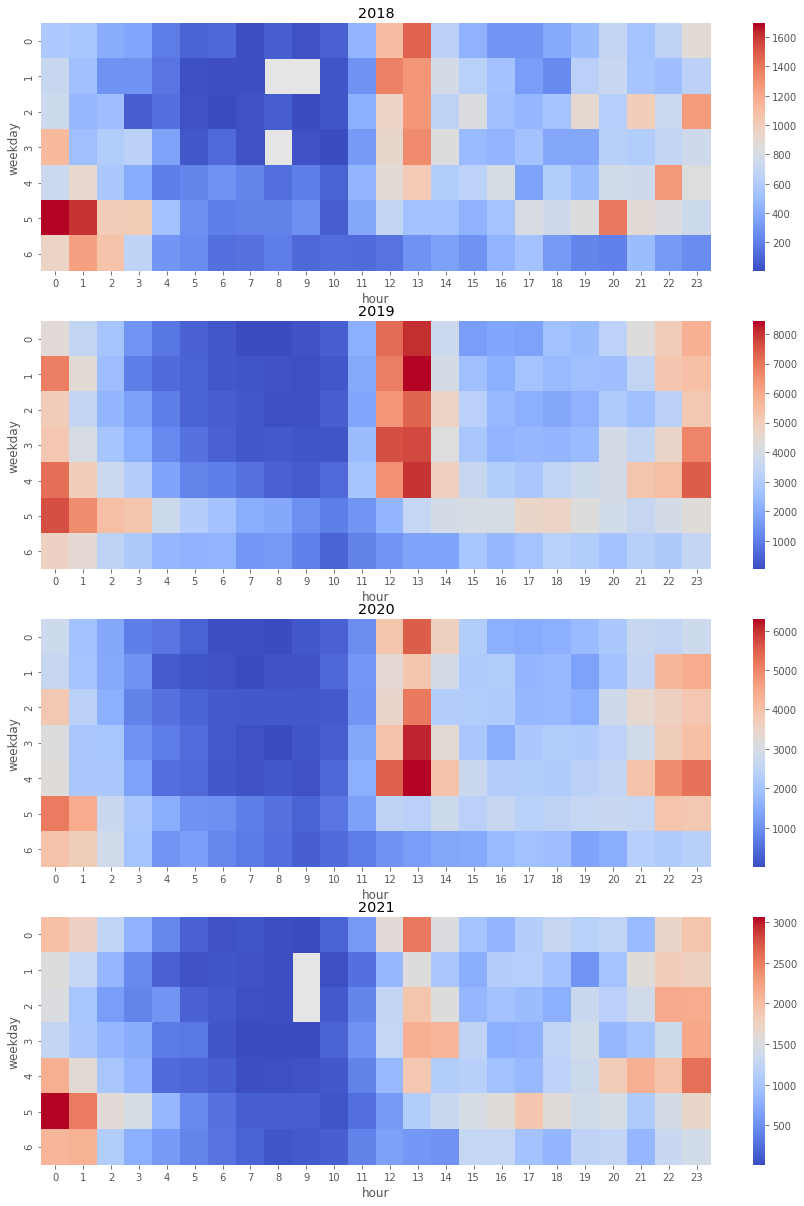

In [200]:
fig, ax = plt.subplots(nrows=4, figsize=(15,7*3))
year_array = [2018, 2019,2020,2021]
for index_h, heat_year in enumerate(waze_heatmap):
    sns.heatmap(heat_year, ax=ax[index_h], cmap="coolwarm")
    ax[index_h].set_title(year_array[index_h])

In [12]:
import plotly.express as px
import pandas as pd

def read_weekday_df(year):
    return pd.read_csv("weekday_by_hour_quito_{}.csv".format(year)).set_index('weekday')


In [18]:
read_weekday_df(2019)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Lunes,442,251,29,44,171,406,2101,7169,8089,3680,...,2492,3297,4291,5055,5818,4377,3415,2739,1478,881
Martes,463,251,202,186,121,247,1975,6887,8440,3992,...,2605,2555,3432,5252,5431,6839,4403,2519,1027,634
Miércoles,508,396,278,99,100,408,1894,6432,7318,4763,...,2201,2958,2589,3267,5167,5028,3497,2305,1747,1034
Jueves,753,439,288,317,195,224,2481,7641,7727,4231,...,2438,3931,3504,4709,6747,5193,4062,2735,2114,1219
Viernes,1127,1019,773,449,350,591,2730,6526,8030,4900,...,3713,3971,5272,5453,7424,7130,5008,3687,3117,1851
Sábado,3091,2669,2079,1936,1351,1022,1493,2276,3542,3927,...,4300,3901,3557,3932,4328,7644,6599,5481,5264,3738
Domingo,2167,2259,1556,1588,1079,516,1110,1536,1813,1862,...,3041,2659,3151,2953,3501,4846,4472,3330,2933,2357


In [49]:
fig = px.imshow(read_weekday_df(2019), color_continuous_scale='OrRd')

fig.add_hrect(y0=0.5, y1=6.5, line_width=0, fillcolor="gray", opacity=0.5)

fig.show()    

In [ ]:
acc_year

In [3]:
import base64
image_filename = 'logo.png' # replace with your own image
encoded_image = base64.b64encode(open(image_filename, 'rb').read())

In [6]:
import plotly.express as px
px.scatter?


import plotly.express as px

df_sub = df_waze_alert
df_sub_quito = df_sub[df_sub['city'] == 'Quito']
df_sample = df_sub_quito.sample(100000,random_state=42)


df_sub = df_waze_alert
df_sub_quito = df_sub[df_sub['city'] == 'Quito']
df_sample = df_sub_quito.sample(100000,random_state=42)

fig = px.animation_frame(df_sample, lat="latitude", lon="longitude", hover_name="city", hover_data=["street"],
                        zoom=8, height=1)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()